#Практическая работа 2
## Цель: Провести анализ данных и исследовать зависимости между признаками, чтобы лучше понять, как работает линейная регрессия

###Шаг 1: Загрузка данных. Загрузите датасет, содержащий числовые признаки (например, Boston Housing, California Housing или другой подходящий из UCI или Kaggle). Импортируйте необходимые библиотеки для работы с данными, визуализацией и анализом. Загрузите данные в DataFrame и просмотрите первые строки, чтобы ознакомиться с набором данных.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv("housing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [ ]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


###Шаг 2: Исследование корреляций. Постройте корреляционную матрицу для числовых признаков. Визуализируйте корреляционную матрицу с помощью тепловой карты (heatmap). Определите пары признаков с наибольшей и наименьшей корреляцией. Для этого найдите максимальные и минимальные значения в корреляционной матрице, исключив диагональные элементы.

<Axes: >

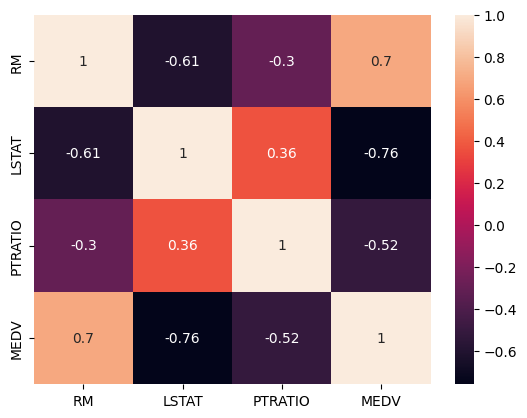

In [ ]:
sns.heatmap(data.corr(),annot=True)

###Шаг 3: Построение графиков зависимостей. Выберите два признака с сильной корреляцией. Замените на реальные названия признаков из вашего датасета. Постройте диаграмму рассеяния (scatter plot) и добавьте линию регрессии.


In [ ]:
m, b = np.polyfit(data["LSTAT"],data["MEDV"], 1)


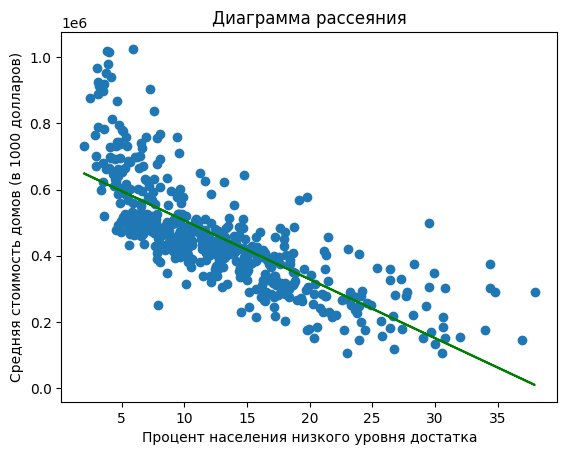

In [ ]:
plt.scatter(data["LSTAT"],data["MEDV"])
plt.plot(data["LSTAT"],  m*data["LSTAT"] + b, color = "green")
plt.title("Диаграмма рассеяния")
plt.xlabel('Процент населения низкого уровня достатка')
plt.ylabel('Средняя стоимость домов (в 1000 долларов)')
plt.show()

###Шаг 4: Подготовка данных. Нормализуйте данные, чтобы привести все признаки к одному масштабу, используя стандартное масштабирование. Разделите данные на обучающую и тестовую выборки в пропорции 80/20.


In [ ]:
scaler = preprocessing.MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data = scaled_data.rename(columns={0: 'RM', 1: 'LSTAT', 2: 'PTRATIO', 3: 'MEDV'})
scaled_data.head()

,RM,LSTAT,PTRATIO,MEDV
0,0.623114,0.083356,0.287234,0.433790
1,0.591276,0.198944,0.553191,0.378995
2,0.749225,0.056960,0.553191,0.678082
3,0.710564,0.026674,0.648936,0.648402
4,0.741369,0.093081,0.648936,0.712329


In [ ]:
train, test = train_test_split(scaled_data, train_size = 0.8)

###Шаг 5: Визуализация трендов. Используйте модель линейной регрессии для предсказания и постройте график распределения ошибок между предсказанными и реальными значениями. Постройте график ошибок (выбросов), чтобы оценить точность модели.


In [ ]:
model = LinearRegression()
x_train, y_train = train[["RM","LSTAT", "PTRATIO"]], train["MEDV"]
x_test, y_test = test[["RM","LSTAT", "PTRATIO"]], test["MEDV"]

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
errors = y_test - y_pred

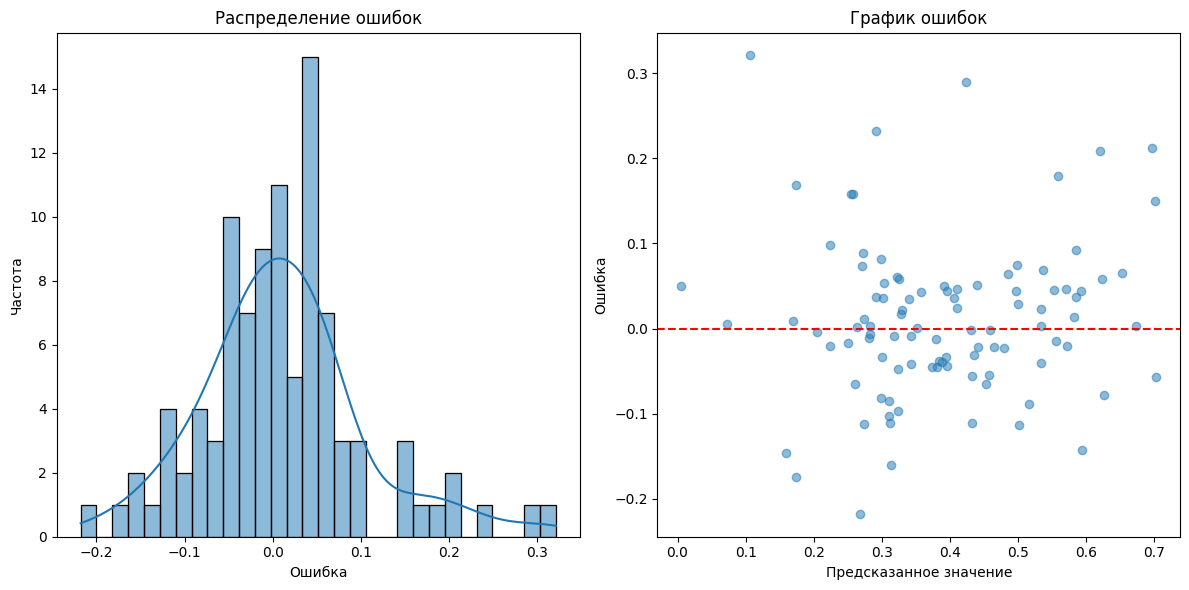

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(errors, kde=True, bins=30)
plt.title('Распределение ошибок')
plt.xlabel('Ошибка')
plt.ylabel('Частота')

# Шаг 5: Построение графика ошибок (выбросов)
plt.subplot(1, 2, 2)
plt.scatter(y_pred, errors, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('График ошибок')
plt.xlabel('Предсказанное значение')
plt.ylabel('Ошибка')

plt.tight_layout()
plt.show()

###Шаг 6: Ответьте на вопросы. Как изменение одного признака влияет на другой? Как влияет масштабирование данных на качество модели?

1. В линейной регрессии каждый признак вносит свой вклад в модель, и его влияние на целевую переменную зависит от его коэффициента. Если признаки скоррелированы, изменение одного признака может косвенно влиять на другой через их взаимосвязь. Например, если два признака сильно коррелированы, изменение одного может вызвать изменение в предсказании модели, поскольку модель будет учитывать их взаимосвязь.
Влияние масштабирования данных на качество модели:

2. Линейная регрессия чувствительна к масштабам признаков, потому что коэффициенты регрессии зависят от единиц измерения признаков. Если признаки имеют разные масштабы, то алгоритм может неправильно интерпретировать их важность. Масштабирование (например, стандартизация или нормализация) приводит к тому, что все признаки находятся в одном масштабе, что улучшает стабильность и интерпретируемость модели. Это также помогает ускорить процесс обучения, так как градиенты при масштабировании данных становятся более равномерными и модель быстрее сходится.


